### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import seaborn as sns

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [32]:
# Calcula la facturación por vendedor para la tienda 1
facturacion_tienda1 = tienda1['Precio'].sum()

# Calcula la facturación por vendedor para la tienda 2
facturacion_tienda2 = tienda2['Precio'].sum()

# Calcular la facturación por vendedor para la tienda 3
facturacion_tienda3 = tienda3['Precio'].sum()

# Calcular la facturación por vendedor para la tienda 4
facturacion_tienda4 = tienda4['Precio'].sum()

In [7]:
#Verificaion del tipo de variable para el grafico
print(type(facturacion_tienda1))
print(type(facturacion_tienda2))
print(type(facturacion_tienda3))
print(type(facturacion_tienda4))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


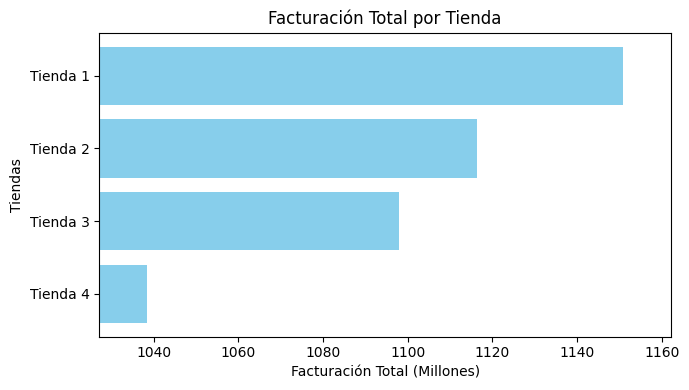

In [20]:
# Datos de facturación y nombres de tiendas
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturaciones = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

# Convierte facturaciones a millones
facturaciones_en_millones = [f / 1000000 for f in facturaciones]

# Crea el gráfico de barras horizontales
plt.figure(figsize=(7, 4))
plt.barh(nombres_tiendas, facturaciones_en_millones, color='skyblue')
plt.xlabel('Facturación Total (Millones)')
plt.ylabel('Tiendas')
plt.title('Facturación Total por Tienda')
plt.gca().invert_yaxis()

# Personaliza las etiquetas del eje x
def millones(x, pos):
    'Formatea el tick como entero'
    return f'{int(x)}'

plt.ticklabel_format(style='plain', axis='x') # Asegura que no haya notación científica
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(millones))

# Establecer los límites del eje x para que el cero represente 1000 millones
min_facturacion_millones = min(facturaciones_en_millones)
max_facturacion_millones = max(facturaciones_en_millones)

# Calcular un rango adecuado basado en los datos en millones
rango = max_facturacion_millones - min_facturacion_millones
padding = rango * 0.1  # Un pequeño espacio alrededor de los datos

plt.xlim(min_facturacion_millones - padding, max_facturacion_millones + padding)

plt.tight_layout()
plt.show()

Por lo tanto en la categoría de facturación la *tienda 4* es la que menos genera, pero pueden haber muchos factores para que esto ocurra, hay que analiza el resto de factores para saber si en realidad es una tienda rentable de mantener o no.

# 2. Ventas por categoría

In [23]:
ventas_categoria_t1 = tienda1.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

In [24]:
# 1. Identifica todas las categorías únicas
categorias_unicas = pd.concat([ventas_categoria_t1, ventas_categoria_t2, ventas_categoria_t3, 
                               ventas_categoria_t4]).index.unique().sort_values(ascending=False)

# 2. Crea un DataFrame para facilitar la graficación
df_comparacion_ventas = pd.DataFrame({
    'Tienda 1': ventas_categoria_t1.reindex(categorias_unicas).fillna(0),
    'Tienda 2': ventas_categoria_t2.reindex(categorias_unicas).fillna(0),
    'Tienda 3': ventas_categoria_t3.reindex(categorias_unicas).fillna(0),
    'Tienda 4': ventas_categoria_t4.reindex(categorias_unicas).fillna(0)
})

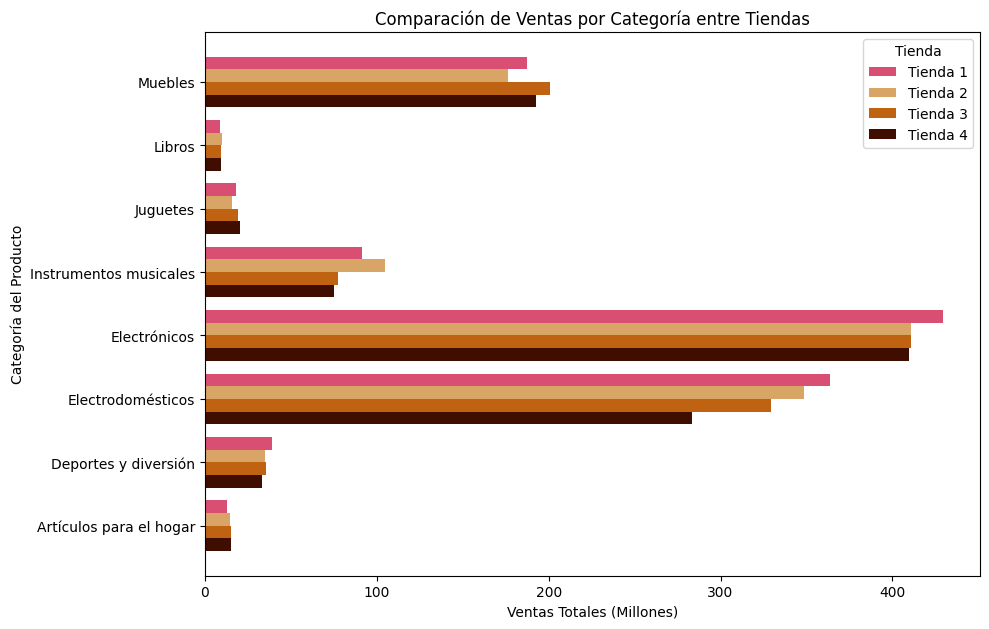

In [25]:
# **Ordenar el DataFrame**
orden_deseado_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Define los colores para cada tienda
colores = ['#D94E73', '#D9A566', '#BF6211', '#400D01'] # rosado, Naranja, Verde, Rojo (colores más agradables)
# Puedes usar cualquier otro código de color (hex, RGB, nombres de colores de matplotlib)

# Ancho de las barras
ancho_barra = 0.2
posiciones = np.arange(len(categorias_unicas))

fig, ax = plt.subplots(figsize=(10, len(categorias_unicas) * 0.8))

for i, tienda in enumerate(orden_deseado_tiendas):
    ax.barh(posiciones + i * ancho_barra, df_comparacion_ventas[tienda] / 1000000,
            ancho_barra, label=tienda, color=colores[i])

ax.set_yticks(posiciones + (len(orden_deseado_tiendas) - 1) / 2 * ancho_barra)
ax.set_yticklabels(categorias_unicas)
ax.invert_yaxis()
ax.set_xlabel('Ventas Totales (Millones)')
ax.set_ylabel('Categoría del Producto')
ax.set_title('Comparación de Ventas por Categoría entre Tiendas')
ax.legend(title='Tienda')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.tight_layout()
plt.show()

Del gráfico se puede observar que los artículos más vendidos son los **electrónicos** en las cuatro tiendas, pero la tienda 4 es la que más vende en comparación a las otras tres tiendas. Además el producto menos vendido son los **libros** y la tienda 3 es la que más libros vende.

Hay 3 productos que llaman la atención, ya que en apariencia sus ventas varían mucho entre las cuatro tiendas, así que se procede a analizarlos: muebles, instrumentos musicales y electrodomésticos.

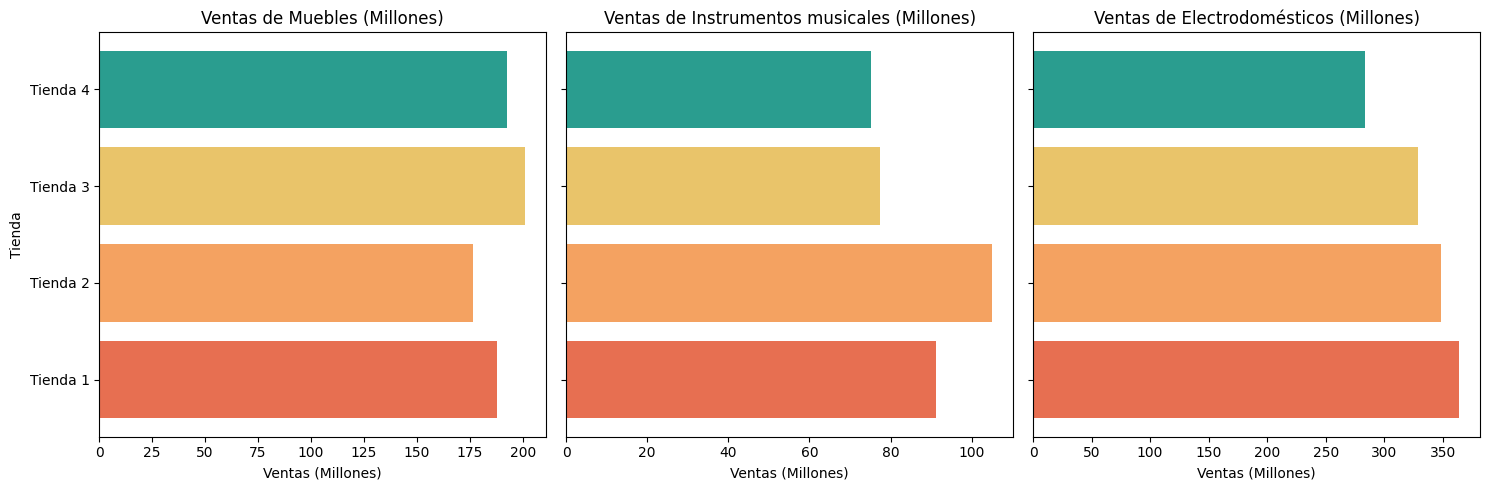

In [4]:
productos_problema = ['Muebles', 'Instrumentos musicales', 'Electrodomésticos']
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
data_por_tienda = {}

for tienda_num in range(1, 5):
    nombre_columna_tienda = f'Tienda {tienda_num}'
    data_por_tienda[nombre_columna_tienda] = df_comparacion_ventas.loc[productos_problema, nombre_columna_tienda].values

fig, axes = plt.subplots(nrows=1, ncols=len(productos_problema), figsize=(15, 5), sharey=True)

for i, producto in enumerate(productos_problema):
    axes[i].barh(nombres_tiendas, [data_por_tienda[f'Tienda {t}'][i] / 1000000 for t in range(1, 5)], color=['#e76f51', '#f4a261', '#e9c46a', '#2a9d8f'])
    axes[i].set_title(f'Ventas de {producto} (Millones)')
    axes[i].set_xlabel('Ventas (Millones)')
    if i == 0:
        axes[i].set_ylabel('Tienda')

plt.tight_layout()
plt.show()

En los 3 gráficos se observa que la mayor diferencia de ventas por tienda se acentúa en la venta de instrumentos musicales y en la venta de electrodomésticos. Así que observemos en los 3 casos de cuánto son esas diferencias exactas.

* **Venta de Muebles**

*Tienda que vende más:* Tienda 3

*Tienda que vende menos:* Tienda 2


In [13]:
# Diferencia 
print(f'Diferencia de: {((ventas_categoria_t3['Muebles'] - ventas_categoria_t2['Muebles'])/1000000):.1f} millones')

Diferencia de: 24.6 millones


* **Venta de Instrumentos musicales**

*Tienda que vende más:* Tienda 2

*Tienda que vende menos:* Tienda 4

In [15]:
# Diferencia 
print(f'Diferencia de: {((ventas_categoria_t2['Instrumentos musicales'] - 
                          ventas_categoria_t4['Instrumentos musicales'])/1000000):.1f} millones')

Diferencia de: 29.9 millones


* **Venta de Electrodomésticos**

*Tienda que vende más:* Tienda 1

*Tienda que vende menos:* Tienda 4

In [16]:
# Diferencia 
print(f'Diferencia de: {((ventas_categoria_t1['Electrodomésticos'] - 
                          ventas_categoria_t4['Electrodomésticos'])/1000000):.1f} millones')

Diferencia de: 80.4 millones


En los 3 casos esta diferencia de ventas es bastante grande, pero en la que más se acentúa es en la venta de electrodomésticos, por lo que podría indicar que la tienda 4 puede tener un marketing deficiente sobre esta categoría aunque no es algo que se pueda asegurar de esta forma, ya que faltaría realizar más analisis al respecto. O ser algo que podría mejorarse.

# 3. Calificación promedio de la tienda


### Análisis de la calificación promedio por tienda

In [3]:
calificacion_tienda1 = round(tienda1.Calificación.mean(), 2)
calificacion_tienda2 = round(tienda2.Calificación.mean(), 2)
calificacion_tienda3 = round(tienda3.Calificación.mean(), 2)
calificacion_tienda4 = round(tienda4.Calificación.mean(), 2)

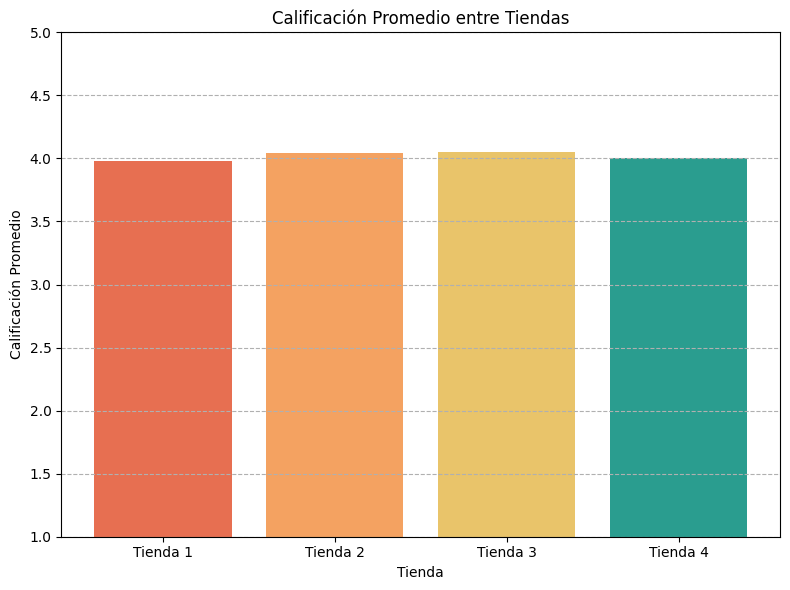

In [4]:
dic_calificaciones_promedio = {
    'Tienda 1': calificacion_tienda1,
    'Tienda 2': calificacion_tienda2,
    'Tienda 3': calificacion_tienda3,
    'Tienda 4': calificacion_tienda4
}

nombres_tiendas = list(dic_calificaciones_promedio.keys())
promedios_calificacion = list(dic_calificaciones_promedio.values())
max1 = tienda1.Calificación.max()
min1 = tienda1.Calificación.min()

plt.figure(figsize=(8, 6))
plt.bar(nombres_tiendas, promedios_calificacion, color=['#e76f51', '#f4a261', '#e9c46a', '#2a9d8f'])
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.title('Calificación Promedio entre Tiendas')
plt.ylim(min1, max1)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

En cuanto a la caclificación de cada tienda, no se notan grandes diferencias, por lo que se procede a analizar la calificación por categoría de producto.

### Análisis de la calificación promedio por categoría y por tienda

In [5]:
calificacion_categoria_t1 = tienda1.groupby('Categoría del Producto')['Calificación'].mean()
calificacion_categoria_t2 = tienda2.groupby('Categoría del Producto')['Calificación'].mean()
calificacion_categoria_t3 = tienda3.groupby('Categoría del Producto')['Calificación'].mean()
calificacion_categoria_t4 = tienda4.groupby('Categoría del Producto')['Calificación'].mean()

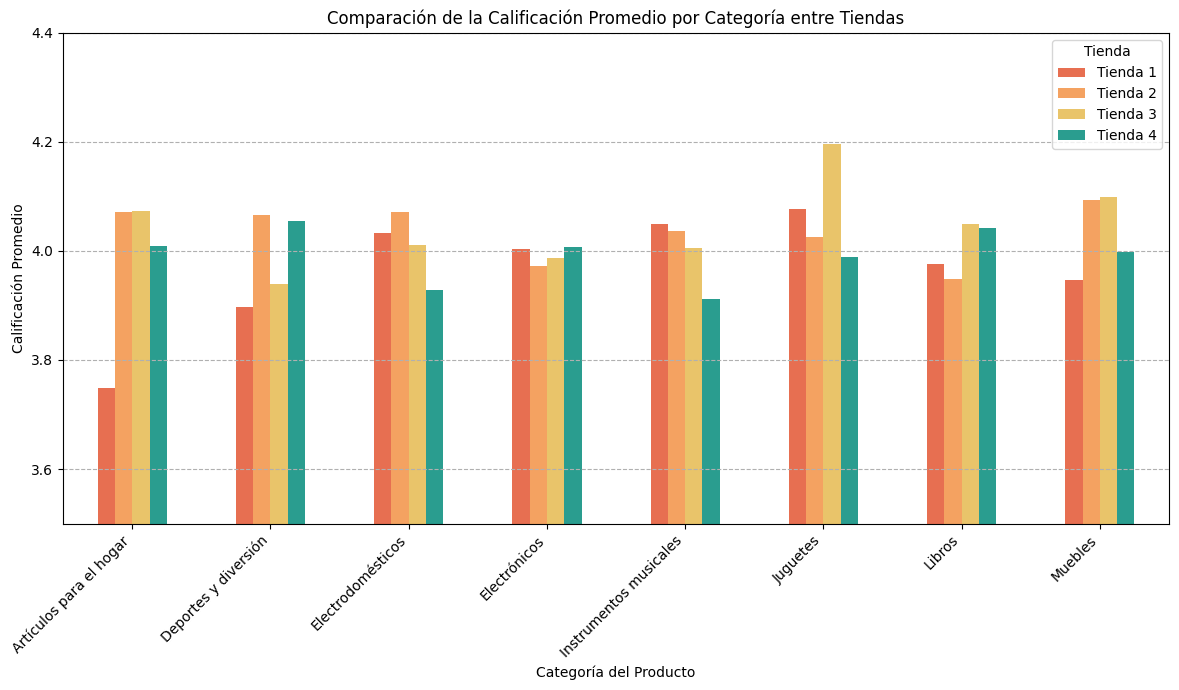

In [6]:
# 1. Identifica todas las categorías únicas
categorias_unicas = pd.concat([calificacion_categoria_t1, calificacion_categoria_t2,
                                calificacion_categoria_t3, calificacion_categoria_t4]).index.unique()

# 2. Crea un DataFrame para facilitar la graficación
df_calificaciones_categ = pd.DataFrame({
    'Tienda 1': calificacion_categoria_t1.reindex(categorias_unicas).fillna(0),
    'Tienda 2': calificacion_categoria_t2.reindex(categorias_unicas).fillna(0),
    'Tienda 3': calificacion_categoria_t3.reindex(categorias_unicas).fillna(0),
    'Tienda 4': calificacion_categoria_t4.reindex(categorias_unicas).fillna(0)
})

# 3. Crea el gráfico de barras agrupadas
ax = df_calificaciones_categ.plot(kind='bar', figsize=(12, 7), color=['#e76f51', '#f4a261', '#e9c46a', '#2a9d8f'])

plt.ylabel('Calificación Promedio')
plt.xlabel('Categoría del Producto')
plt.title('Comparación de la Calificación Promedio por Categoría entre Tiendas')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mejor legibilidad
plt.legend(title='Tienda')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
plt.ylim(3.5, 4.4)
plt.show()

Para el gráfico anterior, la escala ha sido modificada con el fin de resaltar las diferencias, aunque en puntos sea mínima, en realidad estas diferencias nos indican muchas cosas.
1. En **artículos para el hogar** la tienda 1 tiene calificaciones más bajas que en el resto de tiendas, situación que habría que revisar, ¿acaso los productos son de menor calidad?, ¿están mal ubicados? ¿tienen precios más altos? ¿los empleados no están haciendo bien su trabajo frente al cliente? ¿hay problemas con los envíos?

2. En **deportes y diversión** ocurre algo similar, pero esta vez hay 2 tiendas con calificaciones similares (tiendas 2 y 4), pero la calificación de la tienda 1 vuelve a ser la más baja.

3. En **electrodomésticos** la tienda 4 es la de menor puntuación por lo que habría que revisar más esta tienda en sta categoría.

4. En **instrumentos musicales** la tienda 4 tiene menor puntuación así que también habría que revisarla en esta categoría.

5. En **juguetes** la tienda 4 tiene menor calificación, aún asi resalta mucho que la tienda 3 esté tan por encima del rsto, así que habría que revisar también la tienda 3.

6. En **libros** las tiendas (1 y 2) tienen calificacions similares, aún así la tienda 2 es la de menor calificación de las 3, y las otras dos tiendas (3 y 4) también tienen calificaciones similaes, por lo que se podría revisar que tienen en común en parejas para averiguar el motivo de las diferencias.

7. En **muebles** hay una discrepancia mas amplia entre la tienda 1 (menor calificación) y le tienda 3 (mayor calificación) además aquí también van en pares, las tiendas 1 y 4 varían menos entre ellas, y las tiendas 2 y 3 tienen calificaciones similares.

Por lo tanto es necesario analizar más estas variables, ya que por si solas no es posible tomar una decisión de cierre.

### Análisis de la calificación promedio por categoría

### Análisis de la distribución de las calificaciones para cada categoría (comparación por tienda)

In [10]:
tiendas_dfs = {'Tienda 1': tienda1, 'Tienda 2': tienda2, 'Tienda 3': tienda3, 'Tienda 4': tienda4}

#### Artículos para el hogar

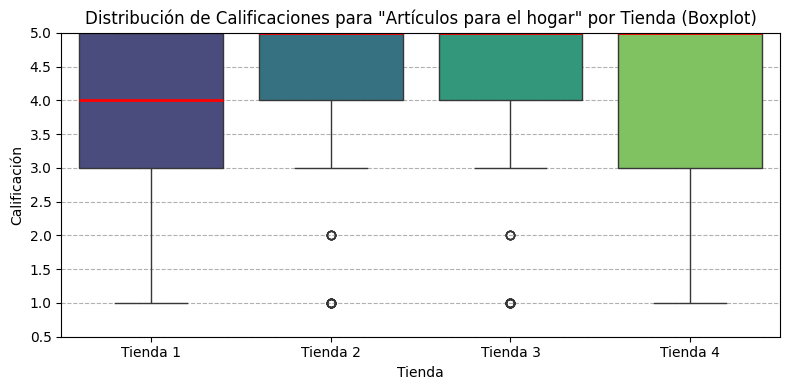

In [21]:
categoria_analizar = 'Artículos para el hogar'

plt.figure(figsize=(8, 4))

# Crear una lista para almacenar DataFrames con la columna 'Tienda' añadida
data_para_boxplot = []
for nombre_tienda, df_tienda in tiendas_dfs.items():
    subset = df_tienda[df_tienda['Categoría del Producto'] == categoria_analizar].copy()
    subset['Tienda'] = nombre_tienda
    data_para_boxplot.append(subset)

# Concatenar los DataFrames en uno solo para Seaborn
df_boxplot = pd.concat(data_para_boxplot)

sns.boxplot(y='Calificación', x='Tienda', data=df_boxplot, palette="viridis", hue='Tienda', 
            legend=False, medianprops={'color': 'red', 'linewidth': 2})
plt.title(f'Distribución de Calificaciones para "{categoria_analizar}" por Tienda (Boxplot)')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.ylim(0.5, 5)
plt.show()

1. La mediana en la **Tienda 1** está sobre 4, lo que indica que el 50% o más de los datos están sobre 4, es decir que el nivel de satisfacción es ligeramente menor en comparación con las otras tiendas. Lo que implica que hay factores que están impidiendo que más clientes queden completamente satisfechos, por lo que requiere mayor analisis.
2. En el caso de las otras 3 tiendas (**Tienda 2**, **Tienda 3** y **Tienda 4**) la mediana está sobre la calificación máxima, esto significa que el 50% o más de los clientes están muy satisfechos.

#### Deportes y diversión

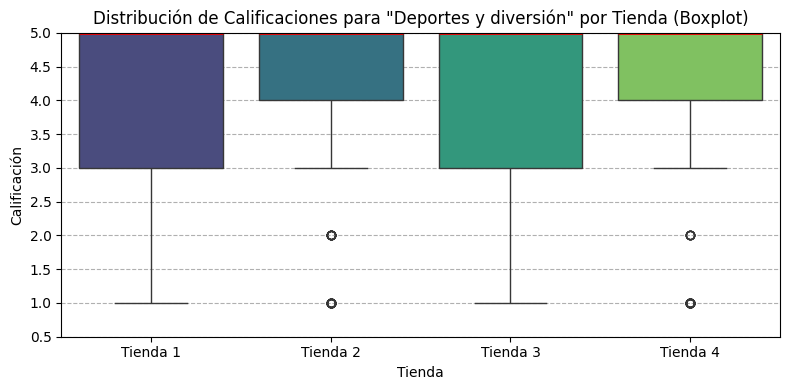

In [20]:
categoria_analizar = 'Deportes y diversión'

plt.figure(figsize=(8, 4))

# Crear una lista para almacenar DataFrames con la columna 'Tienda' añadida
data_para_boxplot = []
for nombre_tienda, df_tienda in tiendas_dfs.items():
    subset = df_tienda[df_tienda['Categoría del Producto'] == categoria_analizar].copy()
    subset['Tienda'] = nombre_tienda
    data_para_boxplot.append(subset)

# Concatenar los DataFrames en uno solo para Seaborn
df_boxplot = pd.concat(data_para_boxplot)

sns.boxplot(y='Calificación', x='Tienda', data=df_boxplot, palette="viridis", hue='Tienda', 
            legend=False, medianprops={'color': 'red', 'linewidth': 2})
plt.title(f'Distribución de Calificaciones para "{categoria_analizar}" por Tienda (Boxplot)')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.ylim(0.5, 5)
plt.show()

1. La mediana en el punto máximo indica gran **satisfacción por parte de los clientes**, esto porque la mediana está ubicada sobre la calificación máxima.
2. La **Tienda 2** y **Tienda 3** poseen puntos atípicos, a los cuales hay que prestarles atención, ya que a pesar de la satisfacción de la mayoría de clientes, el que hayan puntos atípicos indica que hay situaciones anormales que llevan a la insatisfacción.

#### Electrodomésticos

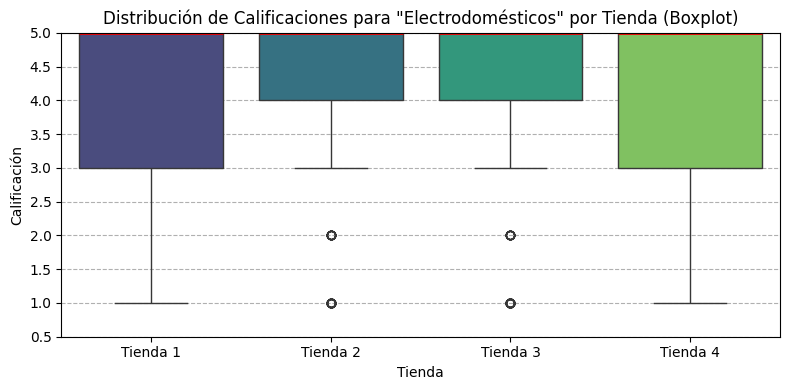

In [19]:
categoria_analizar = 'Electrodomésticos'

plt.figure(figsize=(8, 4))

# Crear una lista para almacenar DataFrames con la columna 'Tienda' añadida
data_para_boxplot = []
for nombre_tienda, df_tienda in tiendas_dfs.items():
    subset = df_tienda[df_tienda['Categoría del Producto'] == categoria_analizar].copy()
    subset['Tienda'] = nombre_tienda
    data_para_boxplot.append(subset)

# Concatenar los DataFrames en uno solo para Seaborn
df_boxplot = pd.concat(data_para_boxplot)

sns.boxplot(y='Calificación', x='Tienda', data=df_boxplot, palette="viridis", hue='Tienda', 
            legend=False, medianprops={'color': 'red', 'linewidth': 2})
plt.title(f'Distribución de Calificaciones para "{categoria_analizar}" por Tienda (Boxplot)')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.ylim(0.5, 5)
plt.show()

1. De igual forma la mediana en el etremo superior indica **satisfacción por parte de la mayoría de clientes**.
2. La **Tienda 2** y **Tienda 3** poseen valores atípicos en esta área, por lo que sería importante prestarles atención, ya que significa que hay clientes que salen muy insatisfechos.

#### Instrumentos musicales

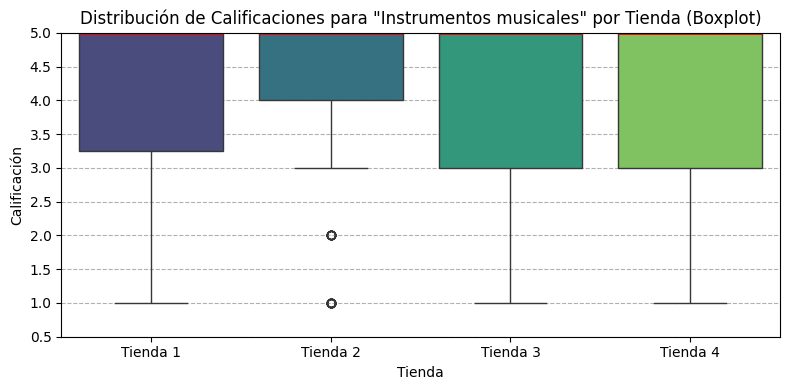

In [18]:
categoria_analizar = 'Instrumentos musicales'

plt.figure(figsize=(8, 4))

# Crear una lista para almacenar DataFrames con la columna 'Tienda' añadida
data_para_boxplot = []
for nombre_tienda, df_tienda in tiendas_dfs.items():
    subset = df_tienda[df_tienda['Categoría del Producto'] == categoria_analizar].copy()
    subset['Tienda'] = nombre_tienda
    data_para_boxplot.append(subset)

# Concatenar los DataFrames en uno solo para Seaborn
df_boxplot = pd.concat(data_para_boxplot)

sns.boxplot(y='Calificación', x='Tienda', data=df_boxplot, palette="viridis", hue='Tienda', 
            legend=False, medianprops={'color': 'red', 'linewidth': 2})
plt.title(f'Distribución de Calificaciones para "{categoria_analizar}" por Tienda (Boxplot)')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.ylim(0.5, 5)
plt.show()

1. La mediana de las cuatro tiendas se ubica en el 5, así que implica **satisfacción por parte de los clientes**.
2. La **Tienda 2** suele obtener mejores calificaciones que el resto de tiendas, pero los puntos atípicos indican que hay ocaciones en las que los clientes salen muy insatisfechos, por lo que falta investigar al respecto.

#### Juguetes

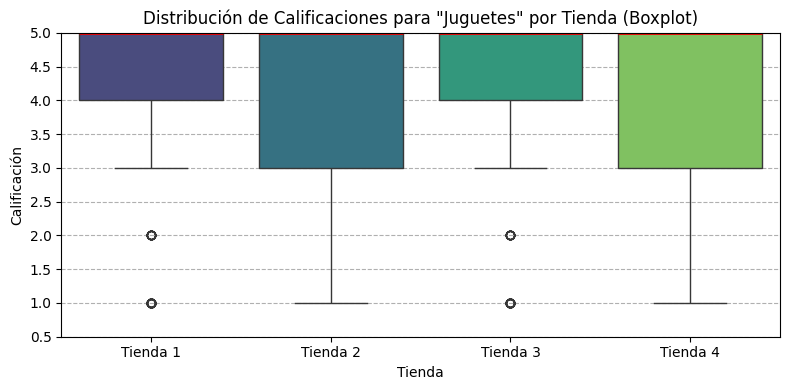

In [17]:
categoria_analizar = 'Juguetes'

plt.figure(figsize=(8, 4))

# Crear una lista para almacenar DataFrames con la columna 'Tienda' añadida
data_para_boxplot = []
for nombre_tienda, df_tienda in tiendas_dfs.items():
    subset = df_tienda[df_tienda['Categoría del Producto'] == categoria_analizar].copy()
    subset['Tienda'] = nombre_tienda
    data_para_boxplot.append(subset)

# Concatenar los DataFrames en uno solo para Seaborn
df_boxplot = pd.concat(data_para_boxplot)

sns.boxplot(y='Calificación', x='Tienda', data=df_boxplot, palette="viridis", hue='Tienda', 
            legend=False, medianprops={'color': 'red', 'linewidth': 2})
plt.title(f'Distribución de Calificaciones para "{categoria_analizar}" por Tienda (Boxplot)')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.ylim(0.5, 5)
plt.show()

1. La mediana está sobre 5, así que significa **satisfacción por parte del cliente**.
2. La **Tienda 1** y **Tienda 3** poseen datos atípicos que podrían indicar experiencias particularmente negativas, que es necesario mejorar, como: 
    * problemas con el producto
    * insatisfacción con el servicio

#### Libros

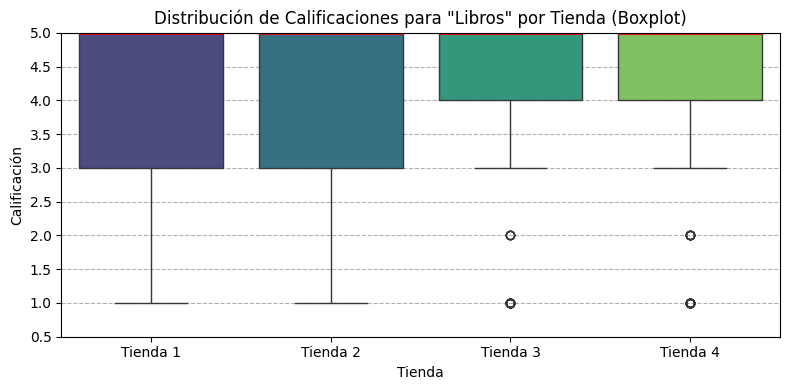

In [15]:
categoria_analizar = 'Libros'

plt.figure(figsize=(8, 4))

# Crear una lista para almacenar DataFrames con la columna 'Tienda' añadida
data_para_boxplot = []
for nombre_tienda, df_tienda in tiendas_dfs.items():
    subset = df_tienda[df_tienda['Categoría del Producto'] == categoria_analizar].copy()
    subset['Tienda'] = nombre_tienda
    data_para_boxplot.append(subset)

# Concatenar los DataFrames en uno solo para Seaborn
df_boxplot = pd.concat(data_para_boxplot)

sns.boxplot(y='Calificación', x='Tienda', data=df_boxplot, palette="viridis", hue='Tienda', 
            legend=False, medianprops={'color': 'red', 'linewidth': 2})
plt.title(f'Distribución de Calificaciones para "{categoria_analizar}" por Tienda (Boxplot)')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.ylim(0.5, 5)
plt.show()

1. En las cuatro tiendas la mediana está sobre la puntuación máxima (5) lo que significa que el 50% o más del total de calificaciones corresponden a la puntuación máxima, lo que implica **satisfacción ór parte de los clientes**
2. En la **Tienda 1** y la **Tienda 2** se puede obervar que hay calificaciones más variadas en el rango de 3 a 5, que en las otras 2 tiendas.
3. En la **Tienda 3** y **Tienda 4** hay puntos atípicos, los cuales habría prestarles atención ya que aunque parezcan opiniones aisladas, podría ser un indicador de que algo no siempre sale bien y que produce estás calificaciones atípicas, y podría afectar en el futuro.

#### Muebles

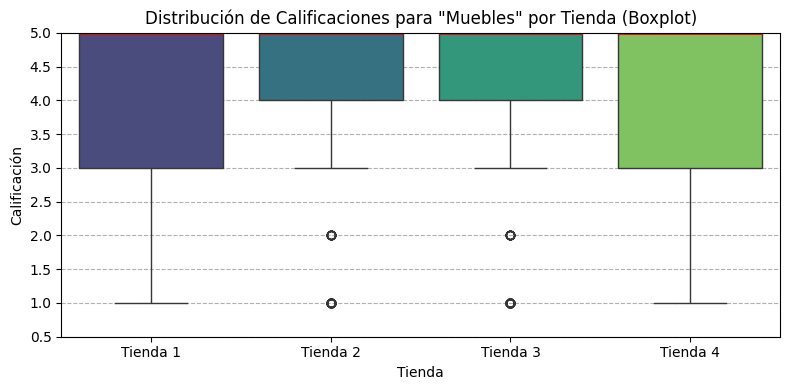

In [16]:
categoria_analizar = 'Muebles'

plt.figure(figsize=(8, 4))

# Crear una lista para almacenar DataFrames con la columna 'Tienda' añadida
data_para_boxplot = []
for nombre_tienda, df_tienda in tiendas_dfs.items():
    subset = df_tienda[df_tienda['Categoría del Producto'] == categoria_analizar].copy()
    subset['Tienda'] = nombre_tienda
    data_para_boxplot.append(subset)

# Concatenar los DataFrames en uno solo para Seaborn
df_boxplot = pd.concat(data_para_boxplot)

sns.boxplot(y='Calificación', x='Tienda', data=df_boxplot, palette="viridis", hue='Tienda', 
            legend=False, medianprops={'color': 'red', 'linewidth': 2})
plt.title(f'Distribución de Calificaciones para "{categoria_analizar}" por Tienda (Boxplot)')
plt.xlabel('Tienda')
plt.ylabel('Calificación')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.ylim(0.5, 5)
plt.show()

1. En la **Tienda 1** se puede observar que el 50% de las calificaciones están entre 3 y 5 al igual que en la **Tienda 4**. Por otra parte en la **Tienda 2** y **Tienda 3** el 50% de los datos están entre 4 y 5.
2. En las cuatro tiendas se presenta una mediana ubicada en el límite superior, esto indica que 50% o más de las calificaciones corresponden a la puntuación máxima de 5, esto indica **satisfacción de los clientes en la categoría de muebles en las 4 tiendas**.

# 4. Productos más y menos vendidos

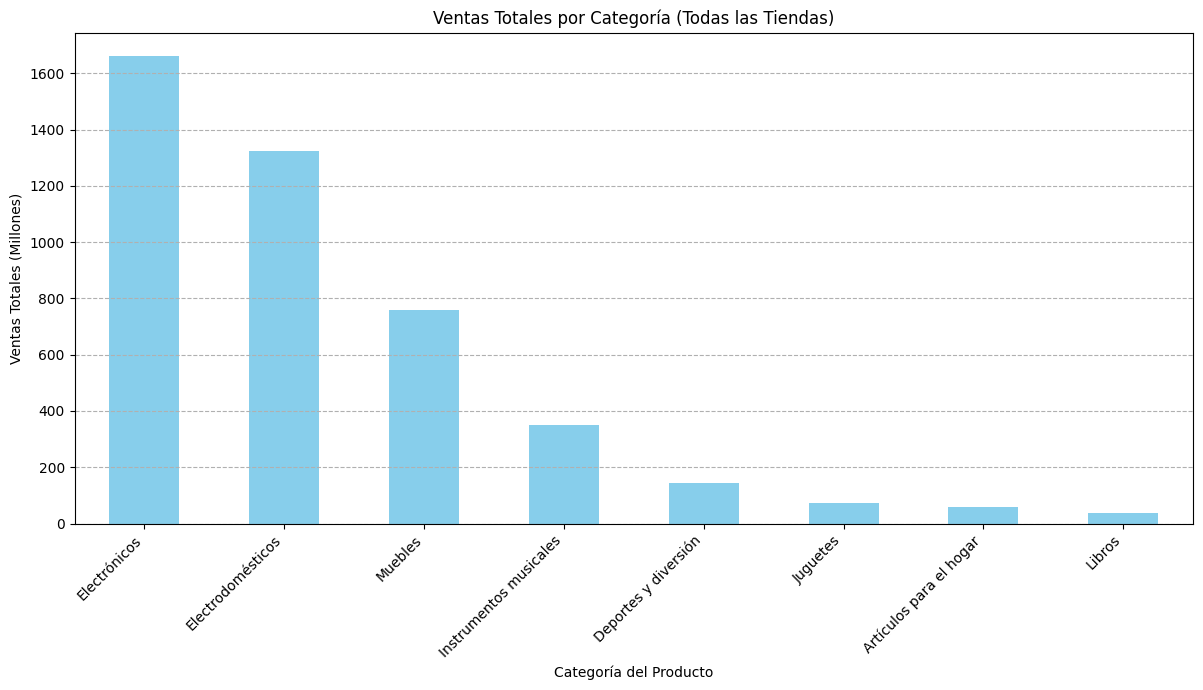

In [28]:
# 1. Sumar las ventas por categoría en todas las tiendas
ventas_totales_por_categoria = df_comparacion_ventas.sum(axis=1)

# 2. Crear el gráfico de barras
ax = ventas_totales_por_categoria.sort_values(ascending=False).plot(kind='bar', figsize=(12, 7), color='skyblue')

plt.ylabel('Ventas Totales (Millones)')
plt.xlabel('Categoría del Producto')
plt.title('Ventas Totales por Categoría (Todas las Tiendas)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--')
ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{x / 1000000:.0f}')) # Formatear el eje y a millones
plt.show()

1. Los dos productos más vendidos son: **Electrónicos**, **Electrodomésticos** y **Muebles**, por lo que podría ser importante resaltar cuales tiendas generan más ganancias en estas áreas.
2. Los productos menos vendidos son: **Libros**, **Artículos para el hogar** y **Juguetes**.

### Cuanto representa cada tienda en el total de ventas

In [32]:
# 1. Calcular el total de ventas por categoría (para obtener el orden)
ventas_totales_por_categoria = df_comparacion_ventas.sum(axis=1).sort_values(ascending=False)

# 2. Obtener el índice ordenado (nombres de las categorías)
orden_categorias = ventas_totales_por_categoria.index

# 3. Calcular el total de ventas por categoría (si no lo hiciste antes)
total_ventas_por_categoria = df_comparacion_ventas.sum(axis=1)

# 4. Calcular el porcentaje de cada tienda en cada categoría
porcentaje_ventas_tienda = df_comparacion_ventas.div(total_ventas_por_categoria, axis=0) * 100

# 5. Reindexar el DataFrame de porcentajes usando el orden del gráfico
tabla_porcentajes_ordenada = porcentaje_ventas_tienda.reindex(orden_categorias)

# 6. Formatear la tabla para una mejor presentación (opcional)
tabla_formateada_ordenada = tabla_porcentajes_ordenada.style.format("{:.1f}%")

# 7. Mostrar la tabla ordenada
tabla_formateada_ordenada

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Electrónicos,25.9%,24.7%,24.7%,24.7%
Electrodomésticos,27.5%,26.3%,24.9%,21.4%
Muebles,24.8%,23.3%,26.5%,25.4%
Instrumentos musicales,26.2%,30.1%,22.2%,21.5%
Deportes y diversión,27.5%,24.3%,24.9%,23.3%
Juguetes,24.4%,21.7%,26.4%,27.5%
Artículos para el hogar,22.1%,25.6%,26.2%,26.2%
Libros,23.3%,26.8%,25.2%,24.7%


1. Como se ha podido observar del gráfico y de la tabla, a pesar de existir productos más o menos vendidos en realidad cada tienda tiene un papel importante en la venta de las diferentes categorias. Esto porque no hay ni un porcentaje que sobresalga del resto como generador de más o menos ventas.
2. Fortalezas que se pueden destacar de cada tienda según sus aportes en las categorías:
    * **Tienda 1:** sus categorías más fuertes son la venta de *electrodomésticos* y *deporte y diversión*. ¿qué factores podrían explicar esto?.
    * **Tienda 2:** destaca en *instrumentos musicales* y *libros*. ¿qué la diferencia del resto? ¿ubicación? ¿precios? requiere analisis de factores.
    * **Tienda 3:** tiene una contribución más alta en *muebles* y *artículos para el hogar*.
    * **Tienda 4:** su contribución más alta es en *juguetes*, y en *artículos para el hogar* empata con la tienda 3.

# 5. Envío promedio por tienda

# 6. Análisis final